In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bpl
from bokeh.io import output_notebook
from bokeh.layouts import row

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


### Section 1:

- What is the average tip amount?

In [4]:
print("the average tip amount is %.5f"%(tips.mean().tip))

the average tip amount is 2.99828


- What is the average bill amount

In [5]:
print("the average bill amount is %.5f"%(tips.mean().total_bill))

the average bill amount is 19.78594


- What is the average tip by gender

In [6]:
print("the average tip of Female is %.5f"%(tips.groupby('sex').mean().tip.Female))
print("the average tip of Male   is %.5f"%(tips.groupby('sex').mean().tip.Male))

the average tip of Female is 2.83345
the average tip of Male   is 3.08962


- What is the average tip on a sunday by gender

In [7]:
print("the average tip of Female on sunday is %.5f"%(tips.groupby(['sex','day']).mean().tip.Female.Sun))
print("the average tip of Male   on sunday is %.5f"%(tips.groupby(['sex','day']).mean().tip.Male.Sun))

the average tip of Female on sunday is 3.36722
the average tip of Male   on sunday is 3.22034


- Which party size gives the maximum tip as a percent of total bill amount

In [8]:
df = tips[['total_bill','tip','size']].groupby('size').sum()
df['percent'] = df.apply(lambda x: x['tip']/x['total_bill'], axis=1)
print('Size of %d gives the maximum tip as a percent of total bill amount'%(df['percent'].idxmax()))

Size of 1 gives the maximum tip as a percent of total bill amount


- If you were a restaurant manager, how might you use this data?

The tips dataset probides by seaborn library includes both categorical data and numerical data. The sex, smoker, day and time are categorical data and total_bill, tip and size are numerical data.

As a restaurant manager, I will analysis this data to increase the restaurant income and improve service quality for some special group. For example, if my restaurant recieve most of tips from smoker, then I might set a smoking zone for those smokers.

### Section 2:

- Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
- Generate the plots using matplotlib, bokeh (or altair an alternative option), and seaborn

In [9]:
df = tips[['tip','total_bill']].copy()

**matplotlib**

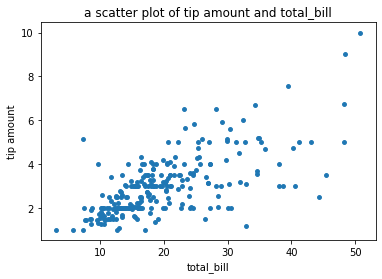

In [10]:
plt.xlabel('total_bill')
plt.ylabel('tip amount')
plt.title('a scatter plot of tip amount and total_bill')
plt.scatter(df.total_bill, df.tip, s=15)

**bokeh**

In [11]:
output_notebook()

Loading BokehJS ...

In [12]:
p = bpl.figure()
p.circle(df.total_bill, df.tip)
p.xaxis.axis_label = "total_bill"
p.yaxis.axis_label = "tip amount"
p.title.text = 'a scatter plot of tip amount and total_bill'
bpl.show(p)

**seaborn**

Text(0.5, 1.0, 'a scatter plot of tip amount and total_bill')

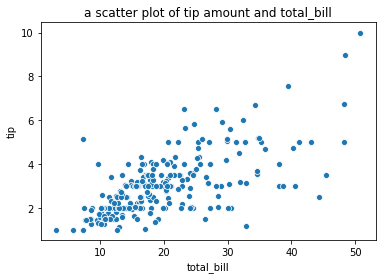

In [13]:
sns.scatterplot(x = 'total_bill', y='tip', data = tips)
plt.title('a scatter plot of tip amount and total_bill')

### Section 3:

- Generate a box plot that shows average bill amount by day of week
- Generate a box plot that shows average bill amount by gender
- Show the above two plots side by side
- Generate the same plots using matplotlib and bokeh (or altair as an alternative)

In [14]:
df_day = tips[['total_bill','day']].copy()
df_sex = tips[['total_bill','sex']].copy()

In [15]:
df_day.groupby('day').describe()

total_bill                                                           
          count       mean       std   min      25%    50%      75%    max
day                                                                       
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17

In [16]:
df_sex.groupby('sex').describe()

total_bill                                                       
            count       mean       std   min    25%    50%    75%    max
sex                                                                     
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30

**seaborn**

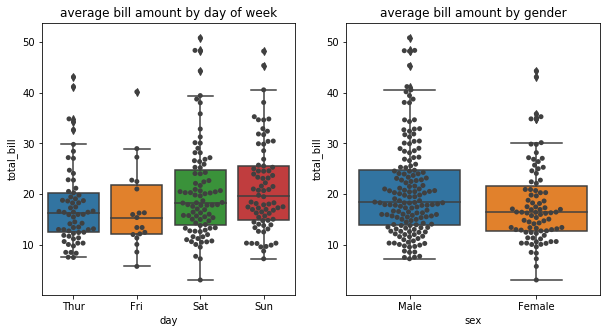

In [17]:
f, axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x="day", y="total_bill", data=tips, ax=axes[0])
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25", ax=axes[0])
axes[0].title.set_text('average bill amount by day of week')

ax = sns.boxplot(x="sex", y="total_bill", data=tips, ax=axes[1])
ax = sns.swarmplot(x="sex", y="total_bill", data=tips, color=".25", ax=axes[1])
axes[1].title.set_text('average bill amount by gender')

**matplotlib**

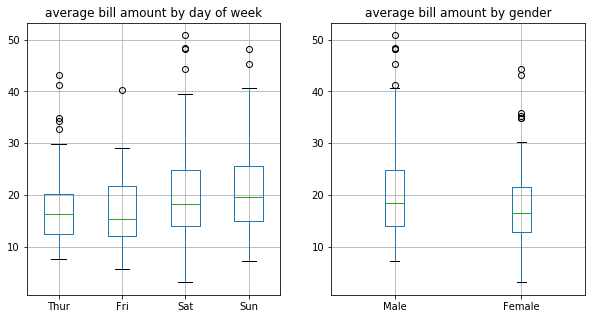

In [18]:
f, axes = plt.subplots(1,2, figsize=(10,5))
x = tips.pivot(columns='day',values='total_bill')
x.boxplot(ax = axes[0])
axes[0].title.set_text('average bill amount by day of week')

x = tips.pivot(columns='sex',values='total_bill')
x.boxplot(ax = axes[1])
axes[1].title.set_text('average bill amount by gender')

**bokeh**

In [19]:
output_notebook()

Loading BokehJS ...

In [20]:
def bokeh_boxplot(groups, values):
    q1 = groups.quantile(q=0.25)
    q2 = groups.quantile(q=0.5)
    q3 = groups.quantile(q=0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    # find the outliers for each category
    def outliers(group):
        d = group.name
        return group[(group.total_bill > upper.loc[d]['total_bill'])|(group.total_bill < lower.loc[d]['total_bill'])]

    out = groups.apply(outliers).dropna()

    if not out.empty:
        outx=[]
        outy=[]
        for keys in out.index:
            outx.append(keys[0])
            outy.append(tips.loc[keys[1]].total_bill)

    p = bpl.figure(background_fill_color="#efefef", x_range=values, toolbar_location=None, plot_width=300, plot_height=300)
    values.sort(key = outx.index)

    qmin = groups.quantile(q=0.00)
    qmax = groups.quantile(q=1.00)
    upper.total_bill = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'total_bill']),upper.total_bill)]
    lower.total_bill = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'total_bill']),lower.total_bill)]



    p.segment(values, upper.total_bill, values, q3.total_bill, line_color="black")
    p.segment(values, lower.total_bill, values, q1.total_bill, line_color="black")

    p.vbar(values, 0.7, q2.total_bill, q3.total_bill, fill_color="#E08E79", line_color="black")
    p.vbar(values, 0.7, q1.total_bill, q2.total_bill, fill_color="#3B8686", line_color="black")

    p.rect(values, lower.total_bill, 0.2, 0.01, line_color="black")
    p.rect(values, upper.total_bill, 0.2, 0.01, line_color="black")

    if not out.empty:
        p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)


    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = "white"
    p.grid.grid_line_width = 2
    p.xaxis.major_label_text_font_size="12pt"
    
    return p



In [21]:
days = tips.day.unique().tolist()
days = list(set(days))
groups = df_day.groupby('day')
p1 = bokeh_boxplot(groups, days)
p1.title.text = 'average bill amount by day of week'

gender = tips.sex.unique().tolist()
gender = list(set(gender))
groups = df_sex.groupby('sex')
p2 = bokeh_boxplot(groups, gender)
p2.title.text = 'average bill amount by gender'

bpl.show(row(p1, p2))

### Section 4:

- Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
- Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
- Are tips larger during lunch or dinner (as a percentage of total_bill)
- Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
- Answer the question by visual examination of lmplot output


Text(0.5, 1, 'linear relationship between tips and total_bil')

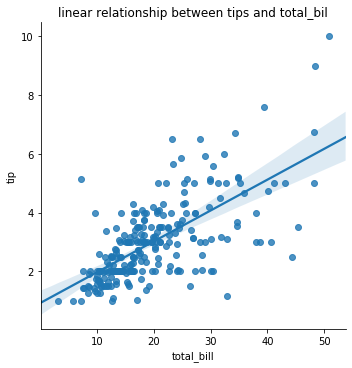

In [22]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.title('linear relationship between tips and total_bil')

From this figure, we can see that the line of total_bill and tip is a positive slope, which means that the tip will increase as total bill increases. 

Text(0.5, 1, 'linear relationship between tips and total_bil in smoker and non-smoker')

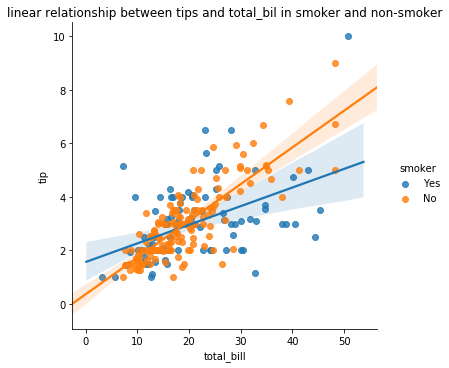

In [23]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
plt.title('linear relationship between tips and total_bil in smoker and non-smoker')

From this figure, we can see that both of smoker and non-smoker are positive slopes, and the tip will increase as total bill increases. However, the non-smoker achieve higher slope than smoker and they are intersect around 20 total_bill. These information indicates when the total bill below to 20, smoker give higher tip as a percentage of total_bill, whereas non-smoker give more when total_bill over 20.

Text(0.5, 1, 'linear relationship between tips and total_bil in Lunch and dinner')

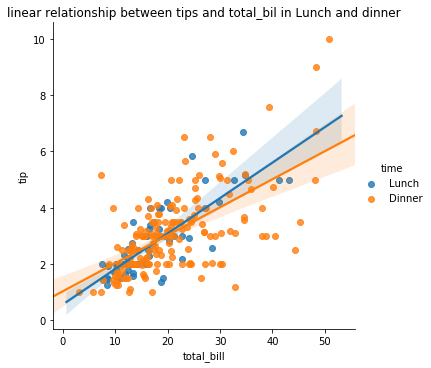

In [24]:
sns.lmplot(x='total_bill', y='tip', hue='time', data=tips)
plt.title('linear relationship between tips and total_bil in Lunch and dinner')

From this figure, we can see that both of Lunc and Dinner are positive slopes, and the tip will increase as total bill increases. However, the Lunch achieve slightly higher slope than Dinner and they are intersect around 18 total_bill. These information indicates when the total bill below to 18, Dinner give slightly higher tip as a percentage of total_bill, whereas non-smoker give more when total_bill over 18.

Text(0.5, 1, 'linear relationship between tips and total_bil in Male and Female')

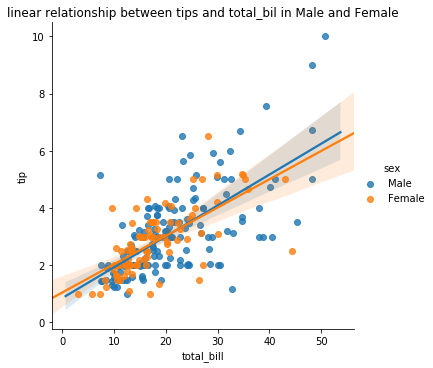

In [25]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.title('linear relationship between tips and total_bil in Male and Female')

From this figure, we can see that both of Male and Female are positive slopes, and the tip will increase as total bill increases and they are in almost equal slope. However, Male still gives little bit higher tip as a percentage of total_bill than Female.

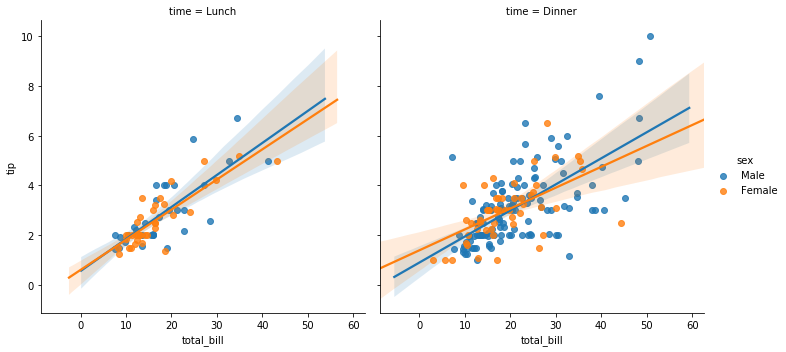

In [33]:
sns.lmplot(x='total_bill', y='tip', col = 'time', hue='sex', data=tips)

From this figure, we can see that both of Male and Female are positive slopes, and Male gives slightly higher tip as a percentage of total_bill than Female in both lunch and dinner.